In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [37]:
data=pd.read_csv("tips.csv")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [39]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

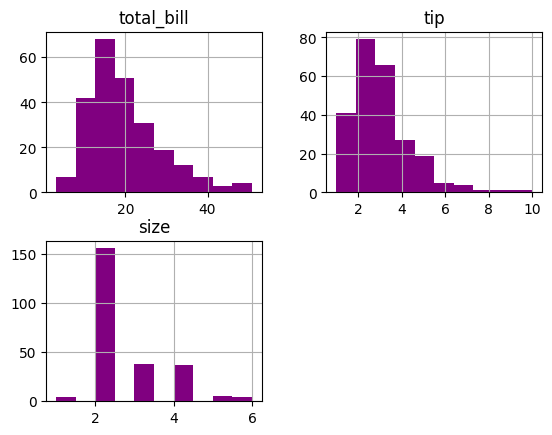

In [40]:
data.hist(color="purple")

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["sex"]=le.fit_transform(data["sex"])
data["smoker"]=le.fit_transform(data["smoker"])
data["day"]=le.fit_transform(data["day"])
data["time"]=le.fit_transform(data["time"])
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


<Axes: >

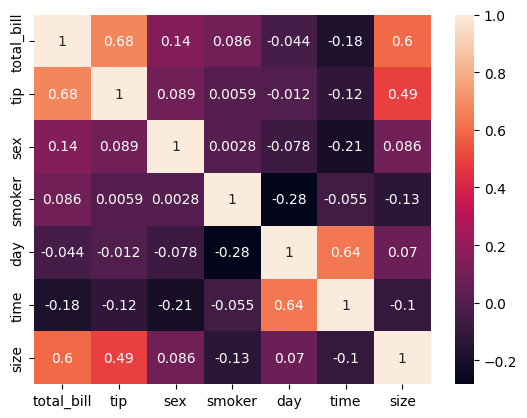

In [42]:
sns.heatmap(data.corr(),annot=True)

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [44]:
x=data.drop(["tip"],axis=1)
y=data["tip"]

In [45]:
x=ss.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regressor=RandomForestRegressor()

In [52]:
paramaters={'criterion':['squared_error','absolute_error','friedman_mse','poisson']}

In [53]:
forest_regressor=GridSearchCV(regressor,paramaters,scoring='accuracy',cv=5)
forest_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson']},
             scoring='accuracy')

In [54]:
forest_regressor.best_params_

{'criterion': 'squared_error'}

In [55]:
predictions=forest_regressor.predict(x_train)
predictions.flatten()

array([2.4954, 2.5664, 3.613 , 4.8474, 2.0416, 2.9734, 1.9495, 3.9902,
       2.349 , 2.7767, 2.8034, 4.8168, 3.1106, 4.8451, 2.8691, 2.4988,
       3.7814, 2.1349, 1.8418, 3.5232, 3.6048, 2.628 , 3.3956, 2.9001,
       2.8955, 2.7139, 3.1536, 3.7172, 4.508 , 3.3382, 4.7512, 1.673 ,
       3.885 , 2.8818, 1.6975, 3.5845, 2.3269, 2.9292, 1.7372, 3.5127,
       4.1243, 2.8253, 4.8108, 1.5016, 3.7293, 3.2387, 2.3702, 4.4925,
       3.3169, 3.7871, 3.308 , 2.708 , 3.5353, 2.6936, 3.1841, 2.4684,
       2.2158, 1.4746, 2.4742, 5.5175, 2.0057, 1.8042, 3.4171, 4.0248,
       4.336 , 2.3011, 2.1683, 1.7931, 2.9961, 3.3133, 5.2633, 8.5363,
       2.405 , 3.3428, 2.4173, 4.7487, 2.0764, 2.4098, 1.8588, 2.5245,
       1.8965, 5.0457, 4.7299, 2.0002, 2.6301, 3.7346, 2.3662, 2.7541,
       6.1123, 3.1694, 2.0463, 1.9228, 1.4066, 1.896 , 1.9883, 3.352 ,
       2.137 , 3.1193, 2.7705, 5.1359, 3.1669, 2.3985, 2.029 , 6.413 ,
       3.7422, 3.1432, 2.9767, 4.6214, 3.9276, 5.4212, 3.3545, 4.3731,
      

In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_train,predictions)
print(score*100)

91.49441084041209
